In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# SECOND CNN - DETECT WHICh TRAFFIC SIGN IS PRESENT


In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, Xception
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.metrics import Precision, Recall

import os
import random
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


"""
import sys
sys.path.append('/content/drive/MyDrive/Traffic Sign Detection/source')
import models as md
import utils
data_path = "/content/drive/MyDrive/Traffic Sign Detection/cnn2"
data_path_2 = "/content/drive/MyDrive/Traffic Sign Detection/cnn2_2"
test_data_path ="/content/drive/MyDrive/Traffic Sign Detection/test_cnn_1"
test_data_path_2 ="/content/drive/MyDrive/Traffic Sign Detection/test_cnn_2"

"""
import sys
sys.path.append('/source')
import models as md
import utils


data_path = "/data/cnn2"
data_path_2 = "/data/cnn2_2"
test_data_path ="/data/test_cnn_1"
test_data_path_2 ="/data/test_cnn_2"

In [2]:


datagen = ImageDataGenerator(
    rescale=1./500,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    validation_split=0.1,

)
#our own data
train_generator = datagen.flow_from_directory(
    data_path,
    target_size=(500, 500),
    batch_size=4,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_path,
    target_size=(500, 500),
    batch_size=4,
    class_mode='categorical',
    subset='validation'
)

#internet data + our own data
train_generator_2 = datagen.flow_from_directory(
    data_path_2,
    target_size=(500, 500),
    batch_size=8,
    class_mode='categorical',
    subset='training'
)

validation_generator_2 = datagen.flow_from_directory(
    data_path_2,
    target_size=(500, 500),
    batch_size=8,
    class_mode='categorical',
    subset='validation'
)



test_datagen = ImageDataGenerator(rescale=1./500)

# mixed data test set
test_generator_2 = test_datagen.flow_from_directory(
    test_data_path_2,
    target_size=(500, 500),
    batch_size=4,
    class_mode='categorical',
    shuffle=False
)
#our own data test set
test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(500, 500),
    batch_size=4,
    class_mode='categorical',
    shuffle=False
)




Found 120 images belonging to 6 classes.
Found 10 images belonging to 6 classes.
Found 577 images belonging to 3 classes.
Found 62 images belonging to 3 classes.
Found 26 images belonging to 3 classes.
Found 18 images belonging to 6 classes.


# Load Trained Models
Load already trained models that we saved. Example code to plot confusion matrix, roc curve and example images are below.

7/7 [==============================] - 2s 85ms/step


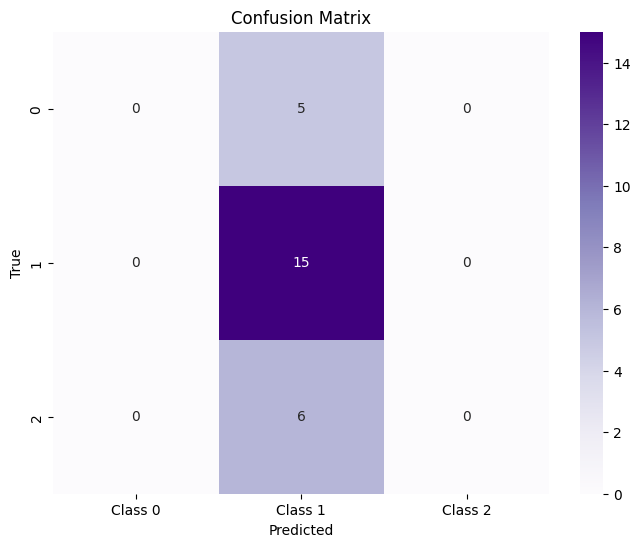

7/7 [==============================] - 6s 344ms/step


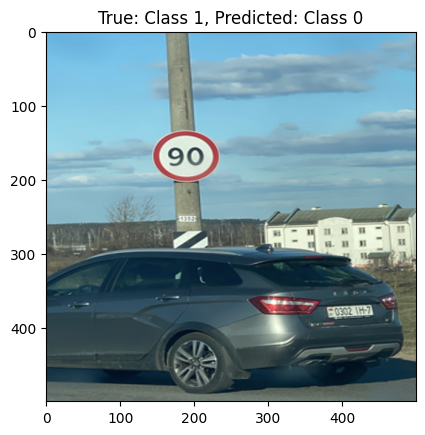

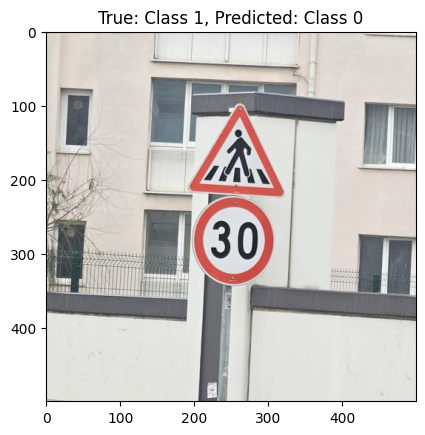

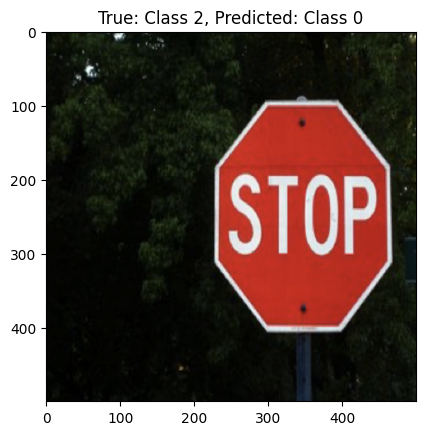

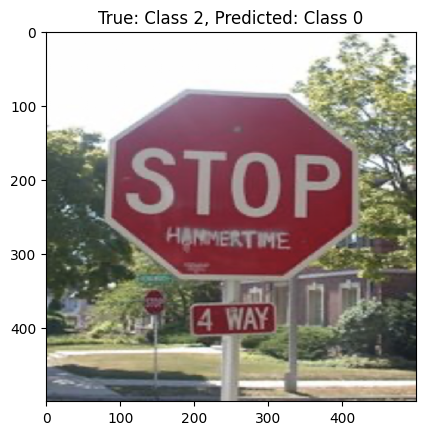

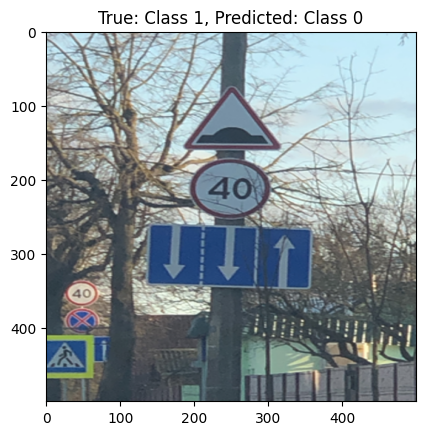

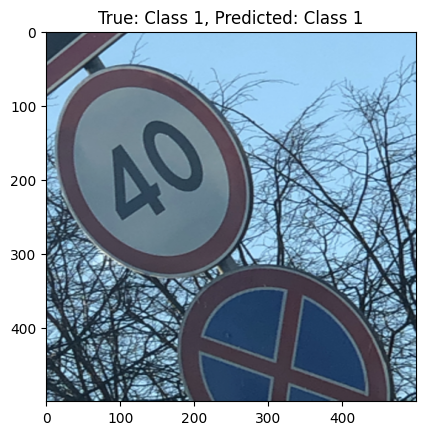

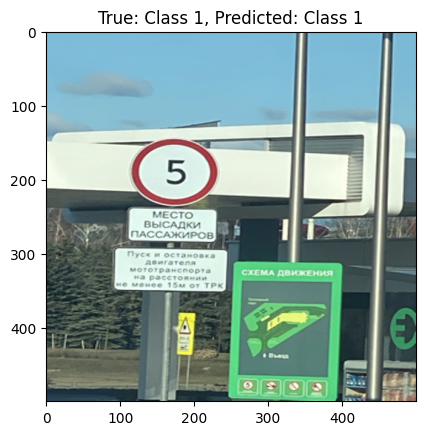

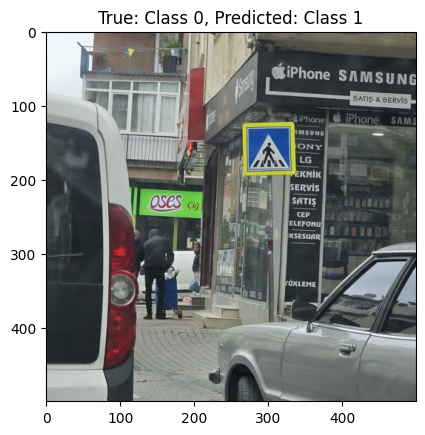

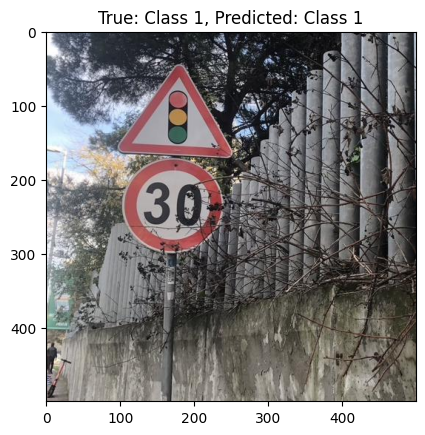

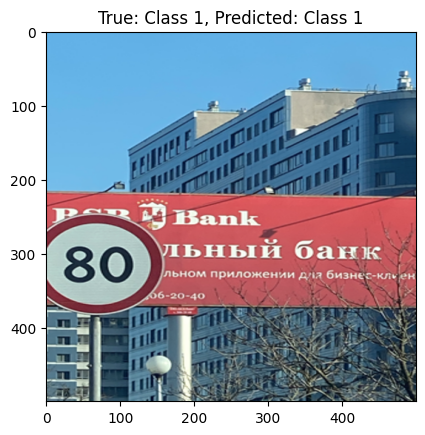

7/7 [==============================] - 8s 538ms/step


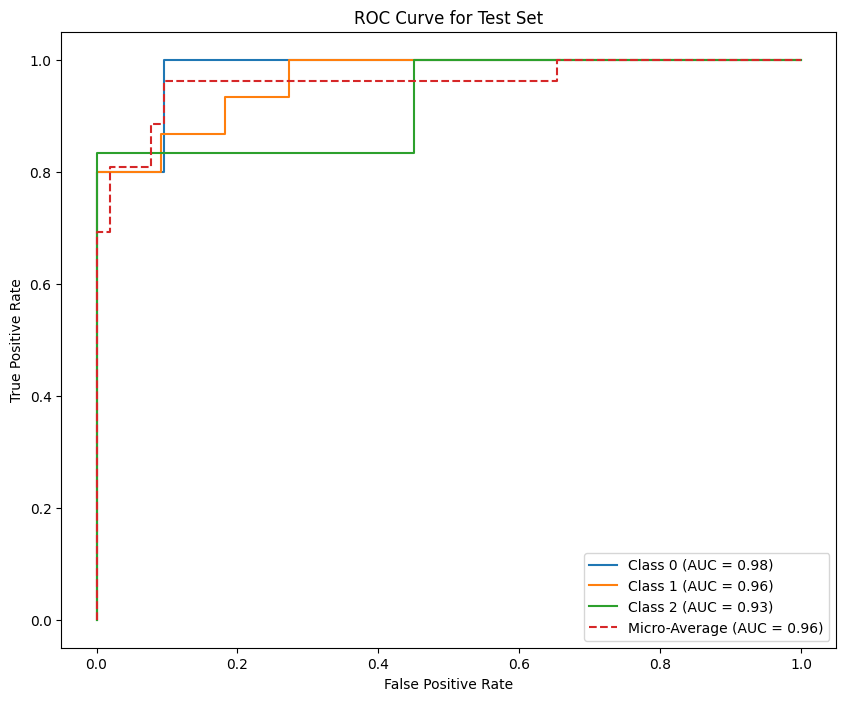

Micro-Average AUC: 0.96


In [3]:
#hold-out method CNN mixed data
model1 = tf.keras.models.load_model("/savedmodels/cnn2_data2.h5")

#stratified k-fold, mixed data
model2 = tf.keras.models.load_model("/savedmodels/cnn2_data2_model2.h5")

#stratified k-fold,built on only our dataset of 120 images:
model3 = tf.keras.models.load_model("/savedmodels/cnn2_data1_model3.h5")

#pretrained models + mixed data
vgg16_model= tf.keras.models.load_model("/savedmodels/vgg16_model.h5")

resnet50_model=tf.keras.models.load_model("/savedmodels/resnet50_model.h5")

inceptionv3_model=tf.keras.models.load_model("/savedmodels/inceptionv3_model.h5")
xception_model=tf.keras.models.load_model("/savedmodels/xception_model.h5")

#example usage of utility functions:
# for mixed data use test_generator_2, for only our own data use test_generator


utils.plotconfusion(model2, test_generator_2)
utils.get_example_predictions(10, xception_model, test_generator_2, test_data_path_2)
utils.plotroccurve(vgg16_model, test_generator_2)




7/7 [==============================] - 8s 413ms/step


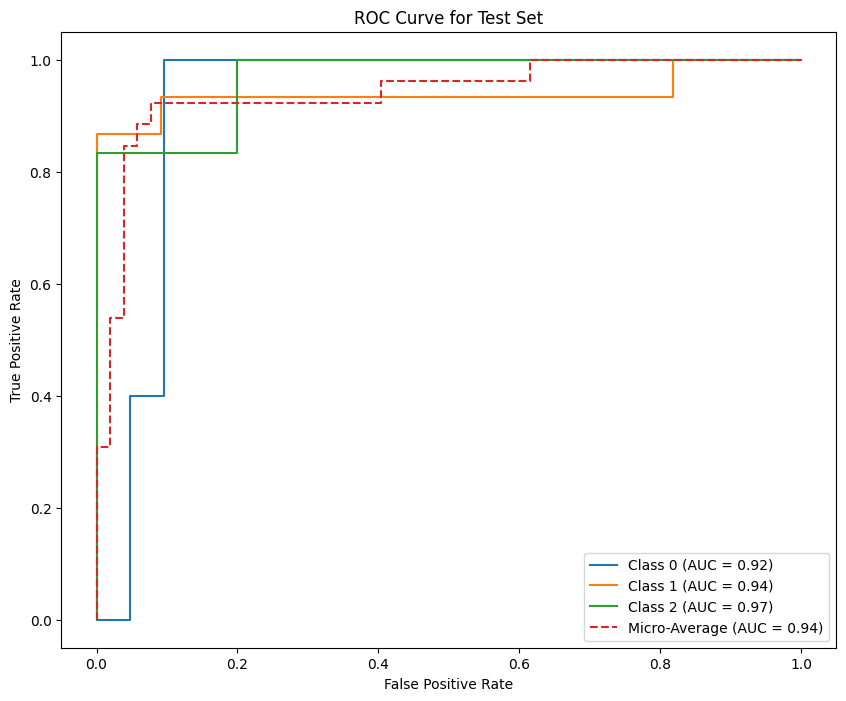

Micro-Average AUC: 0.94


In [5]:
utils.plotroccurve(inceptionv3_model, test_generator_2)

# Train Models From Scratch


In [ ]:
#MODEL 1 - TRAINED BY US WITH MIXED DATASET
lr_scheduler = LearningRateScheduler(utils.lr_schedule)
model1 = md.cnn(3)
model1.fit(train_generator_2, validation_data=validation_generator_2, epochs=7,callbacks=[lr_scheduler])

evaluation_result = model1.evaluate(test_generator_2)

# Print the evaluation result
print("Loss:", evaluation_result[0])
print("Accuracy:", evaluation_result[1])
print("Precision:", evaluation_result[2])
print("Recall:", evaluation_result[3])

Epoch 1/7
73/73 [==============================] - 70s 775ms/step - loss: 62.9322 - accuracy: 0.6360 - precision: 0.7082 - recall: 0.4922 - val_loss: 34.0789 - val_accuracy: 0.6935 - val_precision: 0.8889 - val_recall: 0.2581 - lr: 0.0010
Epoch 2/7
73/73 [==============================] - 72s 989ms/step - loss: 34.7734 - accuracy: 0.6724 - precision: 0.7601 - recall: 0.5546 - val_loss: 33.4503 - val_accuracy: 0.6935 - val_precision: 1.0000 - val_recall: 0.0161 - lr: 0.0010
Epoch 3/7
73/73 [==============================] - 65s 885ms/step - loss: 33.6905 - accuracy: 0.6794 - precision: 0.7558 - recall: 0.5685 - val_loss: 35.2368 - val_accuracy: 0.6935 - val_precision: 0.7000 - val_recall: 0.6774 - lr: 0.0010
Epoch 4/7
73/73 [==============================] - 58s 801ms/step - loss: 8.8176 - accuracy: 0.6794 - precision: 0.7432 - recall: 0.6170 - val_loss: 4.6742 - val_accuracy: 0.6935 - val_precision: 0.6800 - val_recall: 0.5484 - lr: 1.0000e-04
Epoch 5/7
73/73 [=========================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/7 [==============================] - 1s 104ms/step


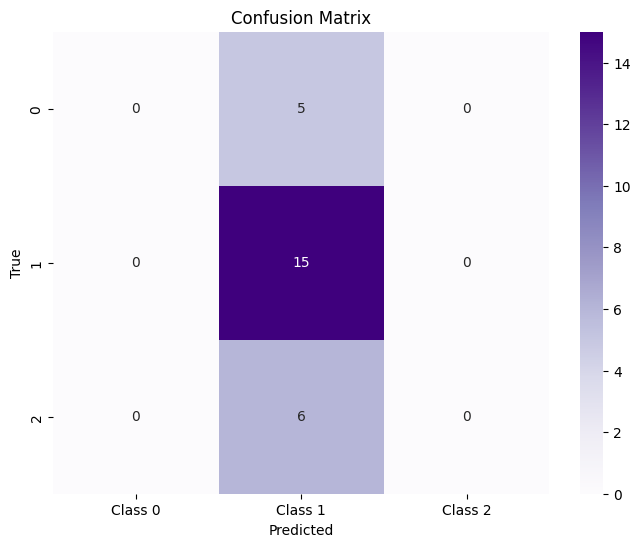

In [ ]:
model1.save("/savedmodels/cnn2_data2.h5")
utils.plotconfusion(model1, test_generator_2)

In [ ]:
#STRATIFIED K-FOLD  FOR MIXED DATA

y = train_generator_2.classes

k_folds = 4
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

#stratified k-fold cross-validation
for fold, (train_index, val_index) in enumerate(skf.split(np.zeros(len(y)), y)):
    train_data_generator = datagen.flow_from_directory(
        data_path_2,
        target_size=(500, 500),
        batch_size=4,
        class_mode='categorical',
        shuffle=True,
        seed=42,
        subset='training',
    )

    #set the indices for the training subset
    train_data_generator.index_array = train_index

    val_data_generator = datagen.flow_from_directory(
        data_path_2,
        target_size=(500, 500),
        batch_size=4,
        class_mode='categorical',
        shuffle=True,
        seed=42,
        subset='validation',
    )

    #et the indices for the validation subset
    val_data_generator.index_array = val_index
    train_data_generator.on_epoch_end()
    val_data_generator.on_epoch_end()

    model2 = md.cnn(3)

    #train the model using the generator
    model2.fit(train_data_generator, epochs=5, verbose=2,callbacks=[lr_scheduler])

    #evaluating the model on the validation set for this fold

    val_loss, val_acc, val_pre, val_acc = model2.evaluate(val_data_generator, steps=None, verbose=2)
    print(f"Fold {fold + 1} - Validation Accuracy: {val_acc}")

evaluation_result1 = model2.evaluate(test_generator_2)
#evaluation result
print("Loss:", evaluation_result1[0])
print("Accuracy:", evaluation_result1[1])
print("Precision:", evaluation_result1[2])
print("Recall:", evaluation_result1[3])



utils.plotconfusion(model2, test_generator_2)

In [ ]:
model2.save("/savedmodels/cnn2_data2_model2.h5")

Found 120 images belonging to 6 classes.
Found 10 images belonging to 6 classes.
Epoch 1/5
60/60 - 16s - loss: 46.9672 - accuracy: 0.2833 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 - lr: 0.0010 - 16s/epoch - 262ms/step
Epoch 2/5
60/60 - 12s - loss: 18.2903 - accuracy: 0.3500 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 - lr: 0.0010 - 12s/epoch - 201ms/step
Epoch 3/5
60/60 - 8s - loss: 17.4314 - accuracy: 0.3500 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 - lr: 0.0010 - 8s/epoch - 134ms/step
Epoch 4/5
60/60 - 10s - loss: 5.8973 - accuracy: 0.3500 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 - lr: 1.0000e-04 - 10s/epoch - 170ms/step
Epoch 5/5
60/60 - 11s - loss: 3.7924 - accuracy: 0.3500 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 - lr: 1.0000e-04 - 11s/epoch - 182ms/step
5/5 - 1s - loss: 3.9159 - accuracy: 0.4000 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 - 797ms/epoch - 159ms/step
Fold 1 - Validation Accuracy: 0.4000000059604645- Precision: 0.0 - Recall - 

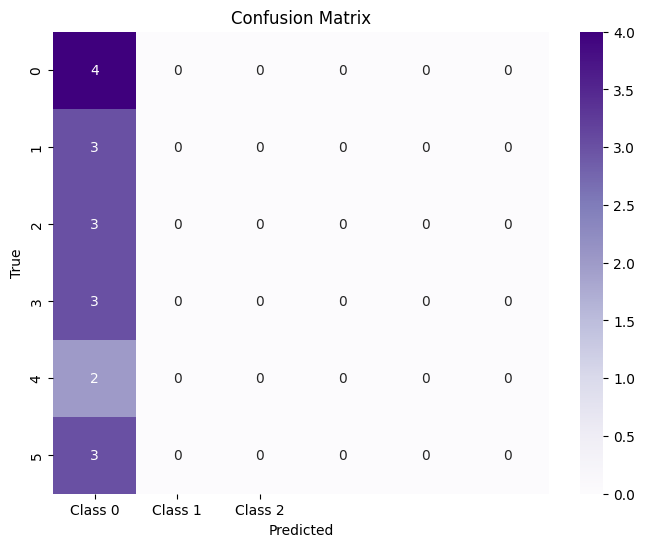

In [ ]:
#ONLY OUR DATASET + STRATIFIED K-FOLD

y = train_generator.classes

k_folds = 3
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

#stratified k-fold cross-validation
for fold, (train_index, val_index) in enumerate(skf.split(np.zeros(len(y)), y)):
    train_data_generator = datagen.flow_from_directory(
        data_path,
        target_size=(500, 500),
        batch_size=2,
        class_mode='categorical',
        shuffle=True,
        seed=42,
        subset='training',
    )

    #set the indices for the training subset
    train_data_generator.index_array = train_index

    val_data_generator = datagen.flow_from_directory(
        data_path,
        target_size=(500, 500),
        batch_size=2,
        class_mode='categorical',
        shuffle=True,
        seed=42,
        subset='validation',
    )

    #set the indices for the validation subset
    val_data_generator.index_array = val_index
    train_data_generator.on_epoch_end()
    val_data_generator.on_epoch_end()

    model3 = md.cnn(6)

    #train the model using the generator
    model3.fit(train_data_generator, epochs=5, verbose=2,callbacks=[lr_scheduler])

    #evaluate the model on the validation set for this fold
    val_steps = len(val_data_generator)
    val_loss, val_acc, val_prec, val_rec = model3.evaluate(val_data_generator, steps=None, verbose=2)
    print(f"Fold {fold + 1} - Validation Accuracy: {val_acc}- Precision: {val_prec} - Recall - {val_rec}")



evaluation_result2 = model3.evaluate(test_generator)
#evaluation result
print("Loss:", evaluation_result2[0])
print("Accuracy:", evaluation_result2[1])
print("Precision:", evaluation_result2[2])
print("Recall:", evaluation_result2[3])



utils.plotconfusion(model3, test_generator)

In [ ]:
model3.save("/savedmodels/cnn2_data1_model3.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Pretrained Models

Epoch 1/15
73/73 [==============================] - 73s 840ms/step - loss: 0.9319 - accuracy: 0.6395 - precision: 0.6511 - recall: 0.6049 - val_loss: 0.8104 - val_accuracy: 0.6935 - val_precision: 0.6935 - val_recall: 0.6935
Epoch 2/15
73/73 [==============================] - 61s 840ms/step - loss: 0.7079 - accuracy: 0.7106 - precision: 0.7285 - recall: 0.6742 - val_loss: 0.8877 - val_accuracy: 0.6774 - val_precision: 0.6800 - val_recall: 0.5484
Epoch 3/15
73/73 [==============================] - 59s 811ms/step - loss: 0.5993 - accuracy: 0.7556 - precision: 0.7927 - recall: 0.6759 - val_loss: 0.8344 - val_accuracy: 0.6935 - val_precision: 0.6935 - val_recall: 0.6935
Epoch 4/15
73/73 [==============================] - 56s 770ms/step - loss: 0.5376 - accuracy: 0.7730 - precision: 0.8131 - recall: 0.7314 - val_loss: 0.7323 - val_accuracy: 0.7419 - val_precision: 0.7333 - val_recall: 0.7097
Epoch 5/15
73/73 [==============================] - 54s 741ms/step - loss: 0.4916 - accuracy: 0.8146

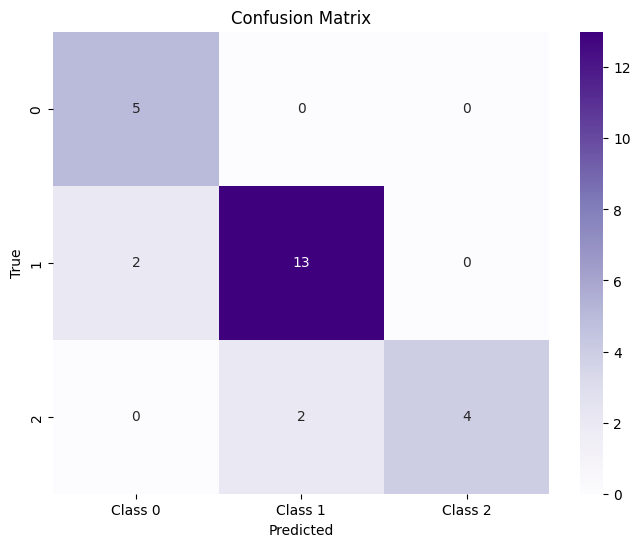

In [ ]:

#PRETRAINED MODEL + MIXED DATA
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(500, 500, 3))
vgg16_model = md.pretrainedcnn(base_model)
# Train the model
vgg16_model.fit(train_generator_2, validation_data=validation_generator_2, epochs=15)
evaluation_result3 = vgg16_model.evaluate(test_generator_2)
# Print the evaluation result
print("Loss:", evaluation_result3[0])
print("Accuracy:", evaluation_result3[1])
print("Precision:", evaluation_result3[2])
print("Recall:", evaluation_result3[3])

utils.plotconfusion(vgg16_model, test_generator_2)

In [ ]:
vgg16_model.save("/savedmodels/vgg16_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/8
73/73 [==============================] - 64s 774ms/step - loss: 1.3579 - accuracy: 0.5927 - precision_1: 0.5854 - recall_1: 0.4575 - val_loss: 0.9004 - val_accuracy: 0.6935 - val_precision_1: 0.6531 - val_recall_1: 0.5161
Epoch 2/8
73/73 [==============================] - 52s 707ms/step - loss: 0.9476 - accuracy: 0.5945 - precision_1: 0.6541 - recall_1: 0.4818 - val_loss: 0.8246 - val_accuracy: 0.6935 - val_precision_1: 0.6935 - val_recall_1: 0.6935
Epoch 3/8
73/73 [==============================] - 57s 781ms/step - loss: 0.9322 - accuracy: 0.5563 - precision_1: 0.6480 - recall_1: 0.4402 - val_loss: 0.8453 - val_accuracy: 0.6935 - val_precision_1: 0.6935 - val_recall_1: 0.6935
Epoch 4/8
73/73 [==============================] - 51s 704ms/step - loss: 0.9330 - accuracy: 0.6291 - precision_1: 0.6966 - recall_1: 0.5373 - val_loss: 0.8626 - val_accuracy: 0.6935 - val_precision_1: 0.6935 - val_recall_1: 0.6935
Epoch 5/8
73/73 [==============================] - 52s 706ms/step - loss

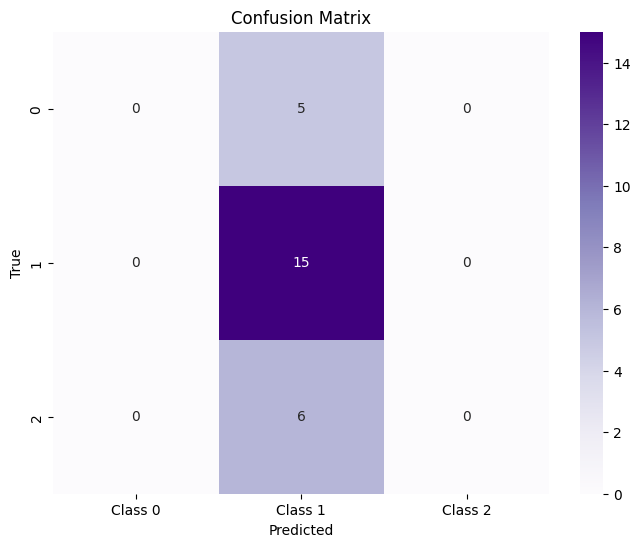

In [ ]:
base_model_2 = ResNet50(weights='imagenet', include_top=False, input_shape=(500, 500, 3))
resnet50_model = md.pretrainedcnn(base_model_2)
resnet50_model.fit(train_generator_2, validation_data=validation_generator_2, epochs=8)
evaluation_result4 = resnet50_model.evaluate(test_generator_2)
# Print the evaluation result
print("Loss:", evaluation_result4[0])
print("Accuracy:", evaluation_result4[1])
print("Precision:", evaluation_result4[2])
print("Recall:", evaluation_result4[3])

utils.plotconfusion(resnet50_model, test_generator_2)


In [ ]:
resnet50_model.save("/savedmodels/resnet50_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/10
73/73 [==============================] - 72s 841ms/step - loss: 0.9252 - accuracy: 0.6984 - precision_2: 0.7217 - recall_2: 0.6516 - val_loss: 1.3372 - val_accuracy: 0.4194 - val_precision_2: 0.4074 - val_recall_2: 0.3548
Epoch 2/10
73/73 [==============================] - 53s 720ms/step - loss: 0.5053 - accuracy: 0.8250 - precision_2: 0.8531 - recall_2: 0.7747 - val_loss: 1.2495 - val_accuracy: 0.5000 - val_precision_2: 0.5102 - val_recall_2: 0.4032
Epoch 3/10
73/73 [==============================] - 51s 702ms/step - loss: 0.3876 - accuracy: 0.8579 - precision_2: 0.8757 - recall_2: 0.8423 - val_loss: 1.4065 - val_accuracy: 0.3226 - val_precision_2: 0.3333 - val_recall_2: 0.2903
Epoch 4/10
73/73 [==============================] - 51s 698ms/step - loss: 0.2671 - accuracy: 0.8925 - precision_2: 0.9119 - recall_2: 0.8787 - val_loss: 1.1352 - val_accuracy: 0.5645 - val_precision_2: 0.5714 - val_recall_2: 0.5161
Epoch 5/10
73/73 [==============================] - 51s 690ms/step -

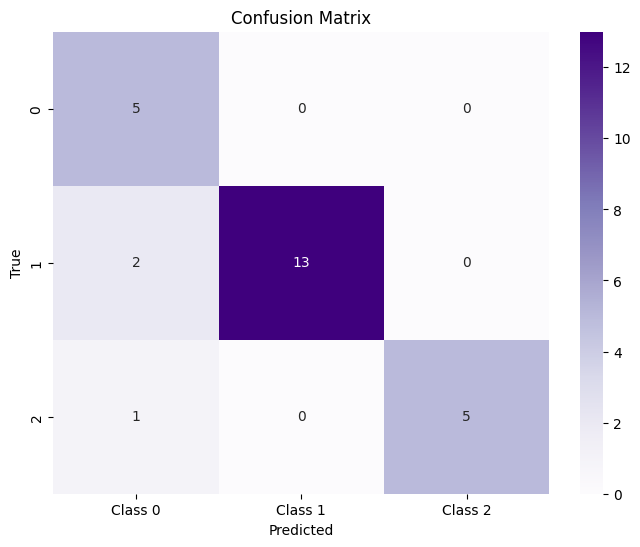

In [ ]:
base_model_3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(500, 500, 3))
inceptionv3_model = md.pretrainedcnn(base_model_3)
inceptionv3_model.fit(train_generator_2, validation_data=validation_generator_2, epochs=10)
evaluation_result5 = inceptionv3_model.evaluate(test_generator_2)
# Print the evaluation result
print("Loss:", evaluation_result5[0])
print("Accuracy:", evaluation_result5[1])
print("Precision:", evaluation_result5[2])
print("Recall:", evaluation_result5[3])

utils.plotconfusion(inceptionv3_model, test_generator_2)

In [ ]:
base_model_4 = Xception(weights='imagenet', include_top=False, input_shape=(500, 500, 3))
xception_model = md.pretrainedcnn(base_model_4)
xception_model.fit(train_generator_2, validation_data=validation_generator_2, epochs=10)
evaluation_result6 = xception_model.evaluate(test_generator_2)
# Print the evaluation result
print("Loss:", evaluation_result6[0])
print("Accuracy:", evaluation_result6[1])
print("Precision:", evaluation_result6[2])
print("Recall:", evaluation_result6[3])



Epoch 1/10
73/73 [==============================] - 64s 776ms/step - loss: 0.6356 - accuracy: 0.7660 - precision_3: 0.7878 - recall_3: 0.7400 - val_loss: 0.8967 - val_accuracy: 0.6935 - val_precision_3: 0.7193 - val_recall_3: 0.6613
Epoch 2/10
73/73 [==============================] - 54s 743ms/step - loss: 0.3369 - accuracy: 0.8666 - precision_3: 0.8721 - recall_3: 0.8510 - val_loss: 1.4056 - val_accuracy: 0.4194 - val_precision_3: 0.4167 - val_recall_3: 0.4032
Epoch 3/10
73/73 [==============================] - 52s 717ms/step - loss: 0.1758 - accuracy: 0.9289 - precision_3: 0.9366 - recall_3: 0.9220 - val_loss: 1.0331 - val_accuracy: 0.6452 - val_precision_3: 0.6500 - val_recall_3: 0.6290
Epoch 4/10
73/73 [==============================] - 51s 703ms/step - loss: 0.1328 - accuracy: 0.9497 - precision_3: 0.9545 - recall_3: 0.9445 - val_loss: 1.6051 - val_accuracy: 0.4677 - val_precision_3: 0.4833 - val_recall_3: 0.4677
Epoch 5/10
73/73 [==============================] - 55s 750ms/step -

7/7 [==============================] - 2s 122ms/step


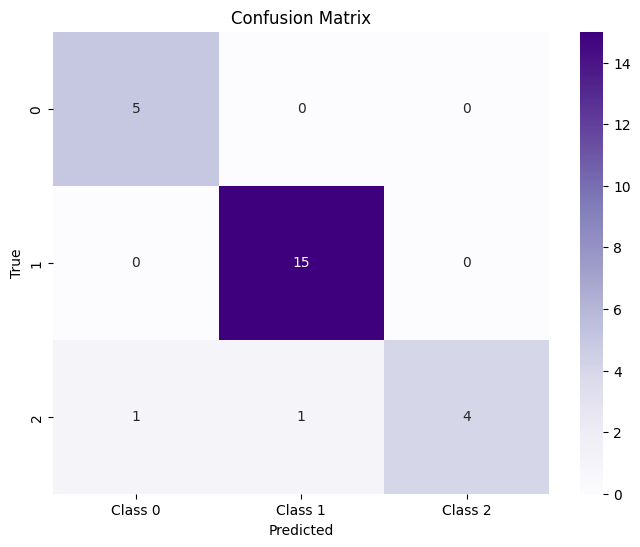

In [ ]:
utils.plotconfusion(xception_model, test_generator_2)

In [ ]:
inceptionv3_model.save("/savedmodels/inceptionv3_model.h5")
xception_model.save("/savedmodels/xception_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
utils.get_example_predictions(5,xception_model,test_generator_2,test_data_path_2)